# **Wildfire Prediction Model**

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

## Import Fire Dataset

In [2]:
# import historical wildfires dataset
fires = pd.read_csv('California_Wildfire_Records_23.csv')
fires.head()

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,IRWINID,ALARM_DATE,CONT_DATE,C_METHOD,CAUSE,OBJECTIVE,GIS_ACRES,COMPLEX_NAME,COMPLEX_ID,COMMENTS,FIRE_NUM,Shape_Length,Shape_Area
0,1,2023.0,California,California Department of Forestry and Fire Pro...,Siskiyou CAL FIRE,WHITWORTH,00004808,{7985848C-0AC2-4BA4-8F0E-29F778652E61},2023/06/17 00:00:00+00,2023/06/17 00:00:00+00,1 - GPS Ground,5 - Debris,Suppression (Wildfire),5.729125,NaN,NaN,NaN,NaN,933.907127,23184.946763
1,2,2023.0,California,Local Response Area,Butte CAL FIRE,KAISER,00010225,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},2023/06/02 00:00:00+00,2023/06/02 00:00:00+00,1 - GPS Ground,5 - Debris,Suppression (Wildfire),13.602385,NaN,NaN,NaN,NaN,986.343353,55046.898792
2,3,2023.0,California,California Department of Forestry and Fire Pro...,Amador - El Dorado CAL FIRE,JACKSON,00017640,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},2023/07/01 00:00:00+00,2023/07/02 00:00:00+00,1 - GPS Ground,2 - Equipment Use,Suppression (Wildfire),27.814465,NaN,NaN,NaN,NaN,2115.572740,112561.147688
3,4,2023.0,California,California Department of Forestry and Fire Pro...,Amador - El Dorado CAL FIRE,CARBON,00018821,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},2023/07/11 00:00:00+00,2023/07/11 00:00:00+00,1 - GPS Ground,9 - Miscellaneous,Suppression (Wildfire),58.760227,NaN,NaN,NaN,NaN,1994.866526,237794.210367
4,5,2023.0,California,California Department of Forestry and Fire Pro...,Amador - El Dorado CAL FIRE,LIBERTY,00018876,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},2023/07/11 00:00:00+00,2023/07/12 00:00:00+00,1 - GPS Ground,14 - Unknown / Unidentified,Suppression (Wildfire),70.978996,NaN,NaN,NaN,NaN,4008.305800,287241.810389


In [3]:
fires.describe(include="all")

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,IRWINID,ALARM_DATE,CONT_DATE,C_METHOD,CAUSE,OBJECTIVE,GIS_ACRES,COMPLEX_NAME,COMPLEX_ID,COMMENTS,FIRE_NUM,Shape_Length,Shape_Area
count,22261.000000,22184.000000,22261,22208,22197,22089,21290,2696,16865,9632,10140,22237,22014,2.226100e+04,602,360,3983,17201,2.226100e+04,2.226100e+04
unique,NaN,NaN,4,10,111,9199,7131,2677,8778,5291,8,18,2,NaN,140,92,1641,3172,NaN,NaN
top,NaN,NaN,California,USDA Forest Service,Los Angeles County,,00000000,{1FE0DBA3-802B-4D0A-B4F7-D0A5BBFF1D7B},2008/06/21 00:00:00+00,2008/07/12 00:00:00+00,1 - GPS Ground,14 - Unknown / Unidentified,Suppression (Wildfire),NaN,MENDOCINO LIGHTNING COMPLEX,00004608,,00000000,NaN,NaN
freq,NaN,NaN,22245,9638,2025,6489,12515,5,122,13,3877,9985,21732,NaN,62,46,1276,3621,NaN,NaN
mean,11131.000000,1977.728814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.937376e+03,NaN,NaN,NaN,NaN,9.175144e+03,7.840315e+06
std,6426.341507,33.604150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.470174e+04,NaN,NaN,NaN,NaN,2.792515e+04,5.949584e+07
min,1.000000,1878.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.356887e-03,NaN,NaN,NaN,NaN,8.838431e+00,5.491126e+00
25%,5566.000000,1951.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.713978e+01,NaN,NaN,NaN,NaN,1.625564e+03,1.098510e+05
50%,11131.000000,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.486008e+02,NaN,NaN,NaN,NaN,3.786087e+03,6.015635e+05
75%,16696.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.210093e+02,NaN,NaN,NaN,NaN,8.198826e+03,2.513135e+06


In [4]:
fires.isnull().sum()

OBJECTID            0
YEAR_              77
STATE               0
AGENCY             53
UNIT_ID            64
FIRE_NAME         172
INC_NUM           971
IRWINID         19565
ALARM_DATE       5396
CONT_DATE       12629
C_METHOD        12121
CAUSE              24
OBJECTIVE         247
GIS_ACRES           0
COMPLEX_NAME    21659
COMPLEX_ID      21901
COMMENTS        18278
FIRE_NUM         5060
Shape_Length        0
Shape_Area          0
dtype: int64

In [5]:
fires.isnull().mean() * 100

OBJECTID         0.000000
YEAR_            0.345896
STATE            0.000000
AGENCY           0.238085
UNIT_ID          0.287498
FIRE_NAME        0.772652
INC_NUM          4.361889
IRWINID         87.889133
ALARM_DATE      24.239702
CONT_DATE       56.731504
C_METHOD        54.449486
CAUSE            0.107812
OBJECTIVE        1.109564
GIS_ACRES        0.000000
COMPLEX_NAME    97.295719
COMPLEX_ID      98.382822
COMMENTS        82.107722
FIRE_NUM        22.730336
Shape_Length     0.000000
Shape_Area       0.000000
dtype: float64

## Data Cleaning and Preprocessing (Fire Data)

In [6]:
# Drop irrelevant columns that do not contribute to prediction or have too many null values
columns_to_drop = ['OBJECTID', 'STATE', 'AGENCY', 'FIRE_NAME', 'INC_NUM', 'IRWINID', 'C_METHOD', 'CAUSE', 'OBJECTIVE', 'COMPLEX_NAME', 'COMPLEX_ID', 'COMMENTS', 'FIRE_NUM', 'Shape_Length', 'Shape_Area']
fires_cleaned = fires.drop(columns = columns_to_drop)


In [7]:
# Convert GIS_ACRES to square meters and rename the column
fires_cleaned['AREA_SQUARE_KM'] = fires_cleaned['GIS_ACRES'] * 0.00404686
fires_cleaned = fires_cleaned.drop(columns = 'GIS_ACRES')

# Rename UNIT_ID column to LOCATION
fires_cleaned = fires_cleaned.rename(columns={'UNIT_ID': 'LOCATION'})

# Convert 'ALARM_DATE' and 'CONT_DATE' to datetime format
fires_cleaned['ALARM_DATE'] = pd.to_datetime(fires_cleaned['ALARM_DATE'], errors='coerce')
fires_cleaned['CONT_DATE'] = pd.to_datetime(fires_cleaned['CONT_DATE'], errors='coerce')

# Check the data types
print(fires_cleaned['ALARM_DATE'].dtype)
print(fires_cleaned['CONT_DATE'].dtype)


datetime64[ns, UTC]
datetime64[ns, UTC]


In [8]:
print(fires_cleaned['ALARM_DATE'].dtype)
print(fires_cleaned['CONT_DATE'].dtype)


datetime64[ns, UTC]
datetime64[ns, UTC]


In [9]:
# Display the last few rows to verify the changes
fires_cleaned.tail()

,YEAR_,LOCATION,ALARM_DATE,CONT_DATE,AREA_SQUARE_KM
22256,NaN,Marin County,NaT,NaT,6.047128
22257,NaN,Marin County,NaT,NaT,1.883953
22258,NaN,Marin County,NaT,NaT,11.846138
22259,NaN,Marin County,NaT,NaT,0.250957
22260,NaN,Marin County,NaT,NaT,0.161930


In [10]:
# Some rows have missing 'YEAR_' values and correspond to very early or irrelevant dates
# Therefore, we will drop them to maintain a consistent dataset
fires_cleaned = fires_cleaned.dropna(subset=['YEAR_'])

# Drop rows with no location (useless for training + small % of missing values)
fires_cleaned = fires_cleaned.dropna(subset=['LOCATION'])

# Display the last few rows to verify the changes
fires_cleaned.tail()

,YEAR_,LOCATION,ALARM_DATE,CONT_DATE,AREA_SQUARE_KM
22179,1898.0,Ventura County,1898-04-01 00:00:00+00:00,NaT,10.688255
22180,1898.0,Ventura County,1898-09-01 00:00:00+00:00,NaT,12.037730
22181,1896.0,Los Angeles County,NaT,NaT,30.479803
22182,1895.0,Los Angeles County,NaT,NaT,2.541888
22183,1878.0,Los Angeles County,NaT,NaT,240.662243


In [11]:
# Drop columns with no alarm nor containment dates (useless for training)
fires_cleaned = fires_cleaned.dropna(subset=['ALARM_DATE', 'CONT_DATE'], how='all')

#

In [12]:
fires_cleaned.isnull().mean() * 100

YEAR_              0.000000
LOCATION           0.000000
ALARM_DATE         0.059319
CONT_DATE         42.964765
AREA_SQUARE_KM     0.000000
dtype: float64

In [13]:
fires_cleaned[fires_cleaned['ALARM_DATE'].isnull() & fires_cleaned['CONT_DATE'].notnull()]

,YEAR_,LOCATION,ALARM_DATE,CONT_DATE,AREA_SQUARE_KM
2856,2016.0,Vandenberg Air Force Base,NaT,2016-09-28 00:00:00+00:00,51.450249
2858,2016.0,Camp Pendleton Marine Corps Base,NaT,2016-07-25 00:00:00+00:00,5.036317
2859,2016.0,Vandenberg Air Force Base,NaT,2016-09-28 00:00:00+00:00,0.912657
5601,2008.0,Shasta-Trinity National Forest,NaT,2008-06-29 00:00:00+00:00,0.161050
5604,2008.0,Shasta-Trinity National Forest,NaT,2008-06-29 00:00:00+00:00,0.157314
5703,2007.0,Bakersfield District - BLM (retired code),NaT,2007-04-06 00:00:00+00:00,3.213709
5780,2007.0,Bakersfield District - BLM (retired code),NaT,2007-07-22 00:00:00+00:00,0.216290
5782,2007.0,CA Desert District - BLM,NaT,2007-06-18 00:00:00+00:00,0.128680
10771,1985.0,Shasta-Trinity National Forest,NaT,1985-08-06 00:00:00+00:00,15.322400
13543,1972.0,Cleveland National Forest,NaT,1972-05-16 00:00:00+00:00,10.861710


In [14]:
# Step 1: Filter out rows with missing ALARM_DATE or CONT_DATE to calculate valid durations
valid_durations = fires_cleaned.dropna(subset=['ALARM_DATE', 'CONT_DATE']).copy()

# Step 2: Calculate duration for rows with both dates present
valid_durations['DURATION'] = (valid_durations['CONT_DATE'] - valid_durations['ALARM_DATE']).dt.days

# Step 3: Calculate average duration per LOCATION and YEAR_
avg_duration_per_location_year = valid_durations.groupby(['LOCATION', 'YEAR_'])['DURATION'].mean()

# Step 4: Define a function to estimate missing ALARM_DATE based on CONT_DATE and average duration
def estimate_alarm_date(row):
    # Check if ALARM_DATE is missing and CONT_DATE is present
    if pd.isnull(row['ALARM_DATE']) and pd.notnull(row['CONT_DATE']):
        # Get average duration for the specific LOCATION and YEAR_
        avg_duration = avg_duration_per_location_year.get((row['LOCATION'], row['YEAR_']), 0)
        # Subtract average duration from CONT_DATE to estimate ALARM_DATE
        return row['CONT_DATE'] - pd.Timedelta(days=avg_duration)
    return row['ALARM_DATE']

# Step 5: Apply the estimation function to fill missing ALARM_DATE values
fires_cleaned['ALARM_DATE'] = fires_cleaned.apply(estimate_alarm_date, axis=1)

# Step 6: Drop the CONT_DATE and YEAR_ columns as they are no longer needed
fires_cleaned = fires_cleaned.drop(columns=['CONT_DATE'])
fires_cleaned = fires_cleaned.drop(columns=['YEAR_'])


# Step 7: Rename ALARM_DATE to DATE for clarity
fires_cleaned.rename(columns={'ALARM_DATE': 'DATE'}, inplace=True)

# Display the head of the cleaned DataFrame
fires_cleaned.head()


,LOCATION,DATE,AREA_SQUARE_KM
0,Siskiyou CAL FIRE,2023-06-17 00:00:00+00:00,0.023185
1,Butte CAL FIRE,2023-06-02 00:00:00+00:00,0.055047
2,Amador - El Dorado CAL FIRE,2023-07-01 00:00:00+00:00,0.112561
3,Amador - El Dorado CAL FIRE,2023-07-11 00:00:00+00:00,0.237794
4,Amador - El Dorado CAL FIRE,2023-07-11 00:00:00+00:00,0.287242


In [15]:
fires_cleaned.isnull().mean() * 100

LOCATION          0.0
DATE              0.0
AREA_SQUARE_KM    0.0
dtype: float64

In [16]:
fires_cleaned.describe(include='all')

,LOCATION,DATE,AREA_SQUARE_KM
count,16858,16858,16858.000000
unique,111,NaN,NaN
top,Los Angeles County,NaN,NaN
freq,1932,NaN,NaN
mean,NaN,1989-10-03 07:51:37.138386432+00:00,8.455405
min,NaN,1898-04-01 00:00:00+00:00,0.000005
25%,NaN,1971-11-10 18:00:00+00:00,0.078970
50%,NaN,1996-08-11 12:00:00+00:00,0.431766
75%,NaN,2012-07-03 18:00:00+00:00,2.252377
max,NaN,2023-12-22 00:00:00+00:00,4179.190804


In [17]:
print(fires_cleaned['LOCATION'].unique())

['Siskiyou CAL FIRE' 'Butte CAL FIRE' 'Amador - El Dorado CAL FIRE'
 'Monterey - San Benito CAL FIRE' 'Shasta - Trinity CAL FIRE'
 'Riverside CAL FIRE' 'Mendocino CAL FIRE' 'Kern County'
 'Santa Barbara County' 'Nevada - Yuba - Placer CAL FIRE'
 'Madera - Mariposa CAL FIRE' 'Ventura County'
 'Tuolumne - Calaveras CAL FIRE' 'San Luis Obispo CAL FIRE'
 'Sonoma - Lake - Napa CAL FIRE' 'San Diego CAL FIRE'
 'San Bernardino CAL FIRE' 'Humboldt - Del Norte CAL FIRE'
 'Tulare CAL FIRE' 'Fresno-Kings CAL FIRE' 'Los Angeles County'
 'San Diego National Wildlife Refuge'
 'Don Edwards San Francisco Bay National Wildlife Refuge'
 'Sacramento River National Wildlife Refuge'
 'Kern National Wildlife Refuge' 'San Bernardino National Forest'
 'Los Padres National Forest' 'Shasta-Trinity National Forest'
 'Stanislaus National Forest' 'Angeles National Forest'
 'Sequoia National Forest' 'Modoc National Forest'
 'Sierra National Forest' 'Mojave - NPS'
 'Redwood National and State Parks' 'Yosemite Nationa

In [18]:
import re

# Function to clean the LOCATION column
def clean_location(location):
    # Remove anything in parentheses
    location = re.sub(r'\(.*?\)', '', location)
    
    # Remove leading and trailing whitespaces
    location = location.strip()
    
    # Standardize hyphen usage with spaces around it
    location = re.sub(r'\s*-\s*', ' - ', location)
    
    # Remove "CAL FIRE" suffix if it exists, as it is redundant
    location = re.sub(r'\s*CAL FIRE\s*', '', location)

    # Remove unnecessary identifiers like National Forest, Park, Refuge, etc.
    location = location.replace('National Forest', '')
    location = location.replace('National Park', '')
    location = location.replace('National Wildlife Refuge', '')
    location = location.replace('National Recreation Area', '')
    location = location.replace('Agency', '')
    location = location.replace('County', '')
    location = location.replace('District - BLM', 'BLM District')
    location = location.replace('Marine Corps Base', 'MCB')
    location = location.replace('Vol. Fire Dept.', 'VFD')
    location = location.replace('City FD', 'City Fire Dept.')
    
    # Remove extra spaces
    location = re.sub(r'\s+', ' ', location)

    # Ensure no trailing or leading whitespaces remain after all replacements
    location = location.strip()

    return location

# Apply the cleaning function to the LOCATION column
fires_cleaned['LOCATION'] = fires_cleaned['LOCATION'].apply(clean_location)

# Display unique cleaned locations
print(fires_cleaned['LOCATION'].unique())


['Siskiyou' 'Butte' 'Amador - El Dorado' 'Monterey - San Benito'
 'Shasta - Trinity' 'Riverside' 'Mendocino' 'Kern' 'Santa Barbara'
 'Nevada - Yuba - Placer' 'Madera - Mariposa' 'Ventura'
 'Tuolumne - Calaveras' 'San Luis Obispo' 'Sonoma - Lake - Napa'
 'San Diego' 'San Bernardino' 'Humboldt - Del Norte' 'Tulare'
 'Fresno - Kings' 'Los Angeles' 'Don Edwards San Francisco Bay'
 'Sacramento River' 'Los Padres' 'Stanislaus' 'Angeles' 'Sequoia' 'Modoc'
 'Sierra' 'Mojave - NPS' 'Redwood National and State Parks' 'Yosemite'
 'Sequoia - Kings Canyon NP' 'Joshua Tree NP' 'Humboldt - Toiyabe'
 'Lassen' 'Six Rivers' 'Tahoe' 'Inyo' 'CA Desert BLM District'
 'Central CA BLM District' 'Colorado River District'
 'Northern CA BLM District' 'Klamath' 'Tehama - Glenn'
 'San Mateo - Santa Cruz' 'Santa Clara' 'Lassen - Modoc' 'Orange' 'Marin'
 'Cleveland' 'Eldorado' 'Fort Yuma' 'San Joaquin River' 'Sacramento'
 'San Luis' 'San Pablo Bay' 'Merced' 'San Diego Bay' 'Colorado River' ''
 'Camp Pendleton MCB' 

In [19]:
# Drop rows where LOCATION is an empty string
fires_cleaned = fires_cleaned[fires_cleaned['LOCATION'] != '']

In [20]:
print(fires_cleaned['LOCATION'].unique())

['Siskiyou' 'Butte' 'Amador - El Dorado' 'Monterey - San Benito'
 'Shasta - Trinity' 'Riverside' 'Mendocino' 'Kern' 'Santa Barbara'
 'Nevada - Yuba - Placer' 'Madera - Mariposa' 'Ventura'
 'Tuolumne - Calaveras' 'San Luis Obispo' 'Sonoma - Lake - Napa'
 'San Diego' 'San Bernardino' 'Humboldt - Del Norte' 'Tulare'
 'Fresno - Kings' 'Los Angeles' 'Don Edwards San Francisco Bay'
 'Sacramento River' 'Los Padres' 'Stanislaus' 'Angeles' 'Sequoia' 'Modoc'
 'Sierra' 'Mojave - NPS' 'Redwood National and State Parks' 'Yosemite'
 'Sequoia - Kings Canyon NP' 'Joshua Tree NP' 'Humboldt - Toiyabe'
 'Lassen' 'Six Rivers' 'Tahoe' 'Inyo' 'CA Desert BLM District'
 'Central CA BLM District' 'Colorado River District'
 'Northern CA BLM District' 'Klamath' 'Tehama - Glenn'
 'San Mateo - Santa Cruz' 'Santa Clara' 'Lassen - Modoc' 'Orange' 'Marin'
 'Cleveland' 'Eldorado' 'Fort Yuma' 'San Joaquin River' 'Sacramento'
 'San Luis' 'San Pablo Bay' 'Merced' 'San Diego Bay' 'Colorado River'
 'Camp Pendleton MCB' 'Li

## Import Weather Dataset

In [21]:
#import multistation climatic dataset
weather = pd.read_csv('CA_Multistation_ClimaticData.csv')
weather.head()

,Stn Id,Stn Name,CIMIS Region,Month Year,Total ETo (mm),qc,Total Precip (mm),qc.1,Avg Sol Rad (W/sq.m),qc.2,...,Avg Min Rel Hum (%),qc.8,Avg Rel Hum (%),qc.9,Avg Dew Point (C),qc.10,Avg Wind Speed (m/s),qc.11,Avg Soil Temp (C),qc.12
0,2,FivePoints,San Joaquin Valley,Jun 1982,151.65,K,3.0,L,272.0,L,...,22.0,L,65.0,L,15.3,L,2.8,L,25.6,L
1,2,FivePoints,San Joaquin Valley,Jul 1982,229.60,K,4.0,L,313.0,L,...,14.0,L,46.0,L,12.4,L,2.4,L,26.1,L
2,2,FivePoints,San Joaquin Valley,Aug 1982,205.94,K,0.0,L,282.0,L,...,20.0,L,44.0,L,11.9,L,2.5,L,26.5,L
3,2,FivePoints,San Joaquin Valley,Sep 1982,139.25,K,30.0,L,222.0,L,...,30.0,L,54.0,L,9.5,L,2.2,L,23.4,L
4,2,FivePoints,San Joaquin Valley,Oct 1982,120.16,K,0.0,L,197.0,L,...,18.0,L,40.0,L,3.6,L,2.0,L,19.4,L


In [22]:
print(weather['Stn Name'].unique())

['FivePoints' 'Shafter' 'Durham' 'Camino' 'Stratford' 'McArthur'
 'U.C. Riverside' 'San Luis Obispo' 'Temecula' 'Santa Ynez' 'Irvine'
 'Oakville' 'Pomona' 'Santa Rosa' 'Browns Valley' 'Cuyama' 'Tulelake FS'
 'Santa Monica' 'Windsor' 'Westlands' 'Sanel Valley' 'King City-Oasis Rd.'
 'Salinas North' 'Victorville' 'San Benito' 'San Juan Valley' 'Otay Lake'
 'Camarillo' 'Escondido SPV' 'Point San Pedro' 'Delano' 'Auburn' 'Gilroy'
 'Gerber South' 'Plymouth' 'Ferndale Plain' 'Smith River']


## Location mapping between Fire and Weather Data

In [23]:
# Dictionary mapping each wildfire location to its coordinates
fire_location_coords = {
    'Siskiyou': (41.5912, -122.5406),
    'Butte': (39.6255, -121.5370),
    'Amador - El Dorado': (38.5216, -120.9049),
    'Monterey - San Benito': (36.6002, -121.8947),
    'Shasta - Trinity': (40.7901, -122.1230),
    'Riverside': (33.9533, -117.3962),
    'Mendocino': (39.5500, -123.4387),
    'Kern': (35.4934, -118.8597),
    'Santa Barbara': (34.4208, -119.6982),
    'Nevada - Yuba - Placer': (39.2614, -121.0164),
    'Madera - Mariposa': (37.2519, -119.6963),
    'Ventura': (34.2746, -119.2290),
    'Tuolumne - Calaveras': (38.0194, -120.3517),
    'San Luis Obispo': (35.2828, -120.6596),
    'Sonoma - Lake - Napa': (38.5771, -122.9888),
    'San Diego': (32.7157, -117.1611),
    'San Bernardino': (34.1083, -117.2898),
    'Humboldt - Del Norte': (40.7543, -123.8695),
    'Tulare': (36.2168, -118.7331),
    'Fresno - Kings': (36.7468, -119.7714),
    'Los Angeles': (34.0522, -118.2437),
    'Don Edwards San Francisco Bay': (37.4827, -122.1315),
    'Sacramento River': (38.4355, -121.5050),
    'Los Padres': (34.6102, -119.7500),
    'Stanislaus': (37.5636, -120.9941),
    'Angeles': (34.3100, -118.5100),
    'Sequoia': (36.4864, -118.5658),
    'Modoc': (41.7159, -120.5542),
    'Sierra': (39.5988, -120.5226),
    'Mojave - NPS': (35.0110, -115.4700),
    'Redwood National and State Parks': (41.2132, -124.0046),
    'Yosemite': (37.8651, -119.5383),
    'Sequoia - Kings Canyon NP': (36.7128, -118.5876),
    'Joshua Tree NP': (33.8734, -115.9010),
    'Humboldt - Toiyabe': (38.7530, -118.6967),
    'Lassen': (40.4983, -121.4208),
    'Six Rivers': (40.9823, -123.7925),
    'Tahoe': (39.0968, -120.0324),
    'Inyo': (36.6054, -118.1445),
    'CA Desert BLM District': (34.7207, -115.9907),
    'Central CA BLM District': (36.7783, -119.4179),
    'Colorado River District': (34.2935, -114.1459),
    'Northern CA BLM District': (40.1554, -122.2166),
    'Klamath': (41.8380, -123.6001),
    'Tehama - Glenn': (40.0755, -122.1746),
    'San Mateo - Santa Cruz': (37.1971, -122.0375),
    'Santa Clara': (37.3337, -121.8907),
    'Lassen - Modoc': (41.0976, -120.8221),
    'Orange': (33.7175, -117.8311),
    'Marin': (38.0834, -122.7633),
    'Cleveland': (33.7456, -117.8678),
    'Eldorado': (38.7426, -120.4358),
    'Fort Yuma': (32.7387, -114.6244),
    'San Joaquin River': (37.7783, -121.2741),
    'Sacramento': (38.5816, -121.4944),
    'San Luis': (35.2828, -120.6596),
    'San Pablo Bay': (38.1085, -122.4662),
    'Merced': (37.3022, -120.4829),
    'San Diego Bay': (32.6859, -117.1245),
    'Colorado River': (34.2935, -114.1459),
    'Camp Pendleton MCB': (33.3853, -117.2330),
    'Linda Fire Department': (39.1402, -121.5502),
    'Beale Air Force Base FD': (39.1361, -121.4363),
    'Plumas': (39.9426, -120.9458),
    'Tule River': (36.1298, -118.6919),
    'Naval Weapons Station': (33.6785, -118.0353),
    'Lakeview District': (39.5209, -120.2530),
    'Santa Monica Mtns': (34.1053, -118.9363),
    'Los Angeles City Fire Dept.': (34.0522, -118.2437),
    'Pixley': (35.9719, -119.2915),
    'Lower Klamath': (41.9771, -121.7436),
    'Sutter': (39.1596, -121.7522),
    'Hoopa Valley Tribe': (41.0502, -123.6753),
    'Lava Beds National Monument': (41.7157, -121.5174),
    'Channel Islands - NPS': (34.0094, -119.8339),
    'Point Reyes National Seashore': (38.0681, -122.7997),
    'Carson City BLM District': (39.1638, -119.7674),
    'Bitter Creek': (34.8486, -119.4084),
    'Tule Lake': (41.9546, -121.4816),
    'Lassen Volcanic NP': (40.4977, -121.4204),
    'Golden Gate - NPS': (37.8199, -122.4783),
    'Delevan': (39.3020, -121.9944),
    'Rogue River - Siskiyou NF': (42.4343, -123.3317),
    'Vallejo Fire Dept.': (38.1041, -122.2566),
    'Ellicott Slough': (36.9097, -121.7553),
    'Vandenberg Air Force Base': (34.7420, -120.5724),
    'Lake Tahoe Basin Management Unit': (39.0968, -120.0324),
    'Hopper Mountain': (34.5370, -118.9654),
    'Stone Lakes': (38.3603, -121.5033),
    'Bakersfield BLM District': (35.3733, -119.0187),
    'Sonny Bono Salton Sea': (33.2993, -115.8417),
    'Clear Lake': (39.0303, -122.6734),
    'City of Weed VFD': (41.4227, -122.3856),
    'Death Valley NP': (36.5323, -116.9325),
    'Fremont': (37.5483, -121.9886),
    'Toiyabe': (38.7530, -118.6967),
    'Camp Roberts Military Base': (35.7464, -120.7674),
    'Sonoma CDF': (38.2919, -122.4580),
    'Pinnacles': (36.4906, -121.1825)
}

In [24]:
# Dictionary mapping each weather station location to its coordinates
weather_station_coords = {
    'FivePoints': (36.3357, -120.1194),
    'Shafter': (35.5005, -119.2717),
    'Durham': (39.6554, -121.7997),
    'Camino': (38.7444, -120.6808),
    'Stratford': (36.1894, -119.8241),
    'McArthur': (41.0504, -121.4077),
    'U.C. Riverside': (33.9746, -117.3311),
    'San Luis Obispo': (35.2828, -120.6596),
    'Temecula': (33.4936, -117.1484),
    'Santa Ynez': (34.6131, -120.0730),
    'Irvine': (33.6846, -117.8265),
    'Oakville': (38.4384, -122.4083),
    'Pomona': (34.0551, -117.7490),
    'Santa Rosa': (38.4404, -122.7141),
    'Browns Valley': (39.2232, -121.3613),
    'Cuyama': (34.9266, -119.6137),
    'Tulelake FS': (41.9565, -121.4816),
    'Santa Monica': (34.0194, -118.4912),
    'Windsor': (38.5471, -122.8163),
    'Westlands': (36.1963, -120.2117),
    'Sanel Valley': (38.9723, -123.0820),
    'King City-Oasis Rd.': (36.2120, -121.1250),
    'Salinas North': (36.6777, -121.6555),
    'Victorville': (34.5361, -117.2912),
    'San Benito': (36.6657, -121.1886),
    'San Juan Valley': (36.8611, -121.5305),
    'Otay Lake': (32.6153, -116.9470),
    'Camarillo': (34.2164, -119.0376),
    'Escondido SPV': (33.1192, -117.0864),
    'Point San Pedro': (37.6009, -122.4963),
    'Delano': (35.7688, -119.2471),
    'Auburn': (38.8966, -121.0769),
    'Gilroy': (37.0058, -121.5683),
    'Gerber South': (40.0540, -122.1770),
    'Plymouth': (38.4810, -120.8455),
    'Ferndale Plain': (40.5768, -124.2639),
    'Smith River': (41.9282, -124.1457)
}

In [25]:
from geopy.distance import geodesic

# Function to find the nearest weather station for each fire location
def find_nearest_weather_station(fire_coords, weather_coords):
    nearest_stations = {}
    for fire_loc, fire_coord in fire_coords.items():
        closest_station = None
        min_distance = float('inf')
        
        for station, station_coord in weather_coords.items():
            distance = geodesic(fire_coord, station_coord).kilometers
            if distance < min_distance:
                min_distance = distance
                closest_station = station
        
        nearest_stations[fire_loc] = closest_station
    
    return nearest_stations

# Find the nearest weather station for each fire location
nearest_weather_station_mapping = find_nearest_weather_station(fire_location_coords, weather_station_coords)

# Output the mapping
nearest_weather_station_mapping


{'Siskiyou': 'Tulelake FS',
 'Butte': 'Durham',
 'Amador - El Dorado': 'Plymouth',
 'Monterey - San Benito': 'Salinas North',
 'Shasta - Trinity': 'McArthur',
 'Riverside': 'U.C. Riverside',
 'Mendocino': 'Sanel Valley',
 'Kern': 'Shafter',
 'Santa Barbara': 'Santa Ynez',
 'Nevada - Yuba - Placer': 'Browns Valley',
 'Madera - Mariposa': 'FivePoints',
 'Ventura': 'Camarillo',
 'Tuolumne - Calaveras': 'Plymouth',
 'San Luis Obispo': 'San Luis Obispo',
 'Sonoma - Lake - Napa': 'Windsor',
 'San Diego': 'Otay Lake',
 'San Bernardino': 'U.C. Riverside',
 'Humboldt - Del Norte': 'Ferndale Plain',
 'Tulare': 'Delano',
 'Fresno - Kings': 'FivePoints',
 'Los Angeles': 'Santa Monica',
 'Don Edwards San Francisco Bay': 'Point San Pedro',
 'Sacramento River': 'Plymouth',
 'Los Padres': 'Santa Ynez',
 'Stanislaus': 'Gilroy',
 'Angeles': 'Santa Monica',
 'Sequoia': 'Delano',
 'Modoc': 'Tulelake FS',
 'Sierra': 'Browns Valley',
 'Mojave - NPS': 'Victorville',
 'Redwood National and State Parks': 'Fern

In [26]:
# Replace values in the 'LOCATION' column with their corresponding mapped weather station
fires_cleaned['LOCATION'] = fires_cleaned['LOCATION'].map(nearest_weather_station_mapping)

# Display the first few rows to verify the change
print(fires_cleaned.head())

      LOCATION                      DATE  AREA_SQUARE_KM
0  Tulelake FS 2023-06-17 00:00:00+00:00        0.023185
1       Durham 2023-06-02 00:00:00+00:00        0.055047
2     Plymouth 2023-07-01 00:00:00+00:00        0.112561
3     Plymouth 2023-07-11 00:00:00+00:00        0.237794
4     Plymouth 2023-07-11 00:00:00+00:00        0.287242


In [27]:
# Convert the unique values to sets and compare them
fires_unique_locations = set(fires_cleaned['LOCATION'].unique())
weather_unique_locations = set(weather['Stn Name'].unique())

# Locations in weather that are not in fires
missing_in_fires = weather_unique_locations - fires_unique_locations
print("Locations in weather but not in fires:", missing_in_fires)


Locations in weather but not in fires: {'King City-Oasis Rd.', 'Westlands', 'Pomona', 'San Juan Valley'}


In [28]:
# Drop rows with these locations in the weather dataset
weather = weather[~weather['Stn Name'].isin(missing_in_fires)]

# Verify the changes
print(weather['Stn Name'].unique())

['FivePoints' 'Shafter' 'Durham' 'Camino' 'Stratford' 'McArthur'
 'U.C. Riverside' 'San Luis Obispo' 'Temecula' 'Santa Ynez' 'Irvine'
 'Oakville' 'Santa Rosa' 'Browns Valley' 'Cuyama' 'Tulelake FS'
 'Santa Monica' 'Windsor' 'Sanel Valley' 'Salinas North' 'Victorville'
 'San Benito' 'Otay Lake' 'Camarillo' 'Escondido SPV' 'Point San Pedro'
 'Delano' 'Auburn' 'Gilroy' 'Gerber South' 'Plymouth' 'Ferndale Plain'
 'Smith River']


In [29]:
# Check for duplicate rows in the fire dataset
duplicates = fires_cleaned.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicate rows if any exist
fires_cleaned = fires_cleaned.drop_duplicates()

Number of duplicate rows: 1


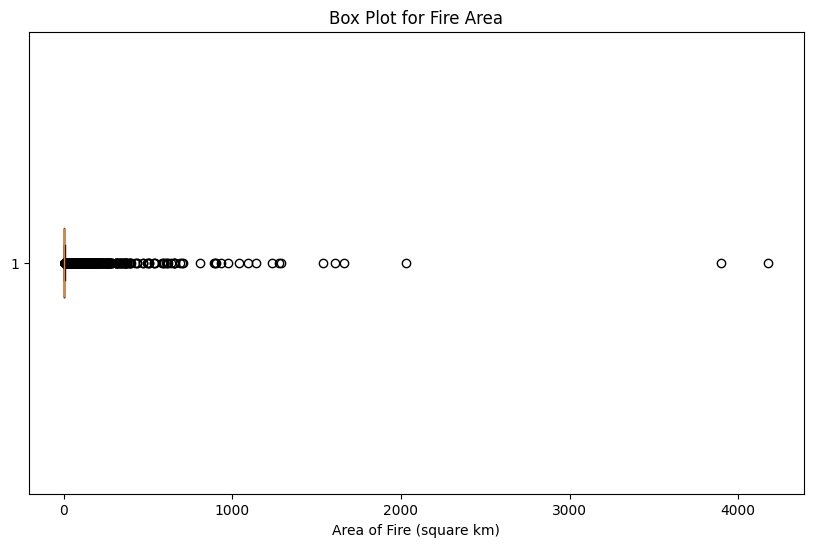

In [30]:
# Box plot for AREA_SQUARE_KM
plt.figure(figsize=(10, 6))
plt.boxplot(fires_cleaned['AREA_SQUARE_KM'], vert=False)
plt.xlabel('Area of Fire (square km)')
plt.title('Box Plot for Fire Area')
plt.show()

**<span style="color: red;">Note:</span>** **Outliers were not removed from the dataset, as they represent severe wildfire events. These data points are important for capturing the full variability of fire severity and ensuring the model can account for extreme cases.**


## Data Cleaning and Preprocessing (Weather Data)

In [31]:
weather.head()

,Stn Id,Stn Name,CIMIS Region,Month Year,Total ETo (mm),qc,Total Precip (mm),qc.1,Avg Sol Rad (W/sq.m),qc.2,...,Avg Min Rel Hum (%),qc.8,Avg Rel Hum (%),qc.9,Avg Dew Point (C),qc.10,Avg Wind Speed (m/s),qc.11,Avg Soil Temp (C),qc.12
0,2,FivePoints,San Joaquin Valley,Jun 1982,151.65,K,3.0,L,272.0,L,...,22.0,L,65.0,L,15.3,L,2.8,L,25.6,L
1,2,FivePoints,San Joaquin Valley,Jul 1982,229.60,K,4.0,L,313.0,L,...,14.0,L,46.0,L,12.4,L,2.4,L,26.1,L
2,2,FivePoints,San Joaquin Valley,Aug 1982,205.94,K,0.0,L,282.0,L,...,20.0,L,44.0,L,11.9,L,2.5,L,26.5,L
3,2,FivePoints,San Joaquin Valley,Sep 1982,139.25,K,30.0,L,222.0,L,...,30.0,L,54.0,L,9.5,L,2.2,L,23.4,L
4,2,FivePoints,San Joaquin Valley,Oct 1982,120.16,K,0.0,L,197.0,L,...,18.0,L,40.0,L,3.6,L,2.0,L,19.4,L


In [32]:
weather.describe(include="all")

,Stn Id,Stn Name,CIMIS Region,Month Year,Total ETo (mm),qc,Total Precip (mm),qc.1,Avg Sol Rad (W/sq.m),qc.2,...,Avg Min Rel Hum (%),qc.8,Avg Rel Hum (%),qc.9,Avg Dew Point (C),qc.10,Avg Wind Speed (m/s),qc.11,Avg Soil Temp (C),qc.12
count,11977.000000,11977,11977,11977,11755.000000,11977,11943.000000,11977,11953.00000,11977,...,11953.000000,11977,11935.000000,11977,11934.000000,11977,11946.000000,11977,11843.000000,11977
unique,NaN,33,11,508,NaN,4,NaN,4,NaN,4,...,NaN,4,NaN,4,NaN,4,NaN,4,NaN,4
top,NaN,FivePoints,San Joaquin Valley,Sep 2024,NaN,,NaN,,NaN,,...,NaN,,NaN,,NaN,,NaN,K,NaN,
freq,NaN,508,1777,33,NaN,6532,NaN,7350,NaN,6778,...,NaN,8712,NaN,5798,NaN,5798,NaN,6172,NaN,7455
mean,85.220339,NaN,NaN,NaN,110.448463,NaN,41.165752,NaN,206.43738,NaN,...,42.539279,NaN,63.970172,NaN,7.320764,NaN,2.060305,NaN,16.490526,NaN
std,58.888491,NaN,NaN,NaN,118.975587,NaN,335.449006,NaN,92.71706,NaN,...,15.705545,NaN,14.780131,NaN,4.893273,NaN,6.021447,NaN,5.805960,NaN
min,2.000000,NaN,NaN,NaN,-9927.520000,NaN,0.000000,NaN,-2938.00000,NaN,...,-366.000000,NaN,0.000000,NaN,-58.600000,NaN,0.500000,NaN,-43.800000,NaN
25%,43.000000,NaN,NaN,NaN,60.055000,NaN,0.200000,NaN,131.00000,NaN,...,32.000000,NaN,54.000000,NaN,4.400000,NaN,1.500000,NaN,12.000000,NaN
50%,83.000000,NaN,NaN,NaN,109.990000,NaN,10.000000,NaN,212.00000,NaN,...,42.000000,NaN,65.000000,NaN,7.500000,NaN,1.800000,NaN,16.600000,NaN
75%,116.000000,NaN,NaN,NaN,157.180000,NaN,43.900000,NaN,281.00000,NaN,...,53.000000,NaN,75.000000,NaN,10.700000,NaN,2.200000,NaN,21.000000,NaN


In [33]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11977 entries, 0 to 13490
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stn Id                11977 non-null  int64  
 1   Stn Name              11977 non-null  object 
 2   CIMIS Region          11977 non-null  object 
 3   Month Year            11977 non-null  object 
 4   Total ETo (mm)        11755 non-null  float64
 5   qc                    11977 non-null  object 
 6   Total Precip (mm)     11943 non-null  float64
 7   qc.1                  11977 non-null  object 
 8   Avg Sol Rad (W/sq.m)  11953 non-null  float64
 9   qc.2                  11977 non-null  object 
 10  Avg Vap Pres (kPa)    11945 non-null  float64
 11  qc.3                  11977 non-null  object 
 12  Avg Max Air Temp (C)  11951 non-null  float64
 13  qc.4                  11977 non-null  object 
 14  Avg Min Air Temp (C)  11951 non-null  float64
 15  qc.5                  11

In [34]:
weather.isnull().sum()

Stn Id                    0
Stn Name                  0
CIMIS Region              0
Month Year                0
Total ETo (mm)          222
qc                        0
Total Precip (mm)        34
qc.1                      0
Avg Sol Rad (W/sq.m)     24
qc.2                      0
Avg Vap Pres (kPa)       32
qc.3                      0
Avg Max Air Temp (C)     26
qc.4                      0
Avg Min Air Temp (C)     26
qc.5                      0
Avg Air Temp (C)         25
qc.6                      0
Avg Max Rel Hum (%)      24
qc.7                      0
Avg Min Rel Hum (%)      24
qc.8                      0
Avg Rel Hum (%)          42
qc.9                      0
Avg Dew Point (C)        43
qc.10                     0
Avg Wind Speed (m/s)     31
qc.11                     0
Avg Soil Temp (C)       134
qc.12                     0
dtype: int64

In [35]:
# Drop columns irrelevant to the prediction
weather_cleaned = weather.drop(columns=['Stn Id', 'CIMIS Region', 'qc', 'qc.1', 'qc.2', 'qc.3', 'qc.4', 'qc.5', 'qc.6', 'qc.7', 'qc.8', 'qc.9', 'qc.10', 'qc.11', 'qc.12'])
weather_cleaned.head()

,Stn Name,Month Year,Total ETo (mm),Total Precip (mm),Avg Sol Rad (W/sq.m),Avg Vap Pres (kPa),Avg Max Air Temp (C),Avg Min Air Temp (C),Avg Air Temp (C),Avg Max Rel Hum (%),Avg Min Rel Hum (%),Avg Rel Hum (%),Avg Dew Point (C),Avg Wind Speed (m/s),Avg Soil Temp (C)
0,FivePoints,Jun 1982,151.65,3.0,272.0,1.7,32.1,15.2,22.6,85.0,22.0,65.0,15.3,2.8,25.6
1,FivePoints,Jul 1982,229.60,4.0,313.0,1.5,35.6,14.9,25.3,77.0,14.0,46.0,12.4,2.4,26.1
2,FivePoints,Aug 1982,205.94,0.0,282.0,1.4,35.2,16.1,25.4,81.0,20.0,44.0,11.9,2.5,26.5
3,FivePoints,Sep 1982,139.25,30.0,222.0,1.2,30.3,10.1,19.9,91.0,30.0,54.0,9.5,2.2,23.4
4,FivePoints,Oct 1982,120.16,0.0,197.0,0.8,29.9,7.1,17.6,80.0,18.0,40.0,3.6,2.0,19.4


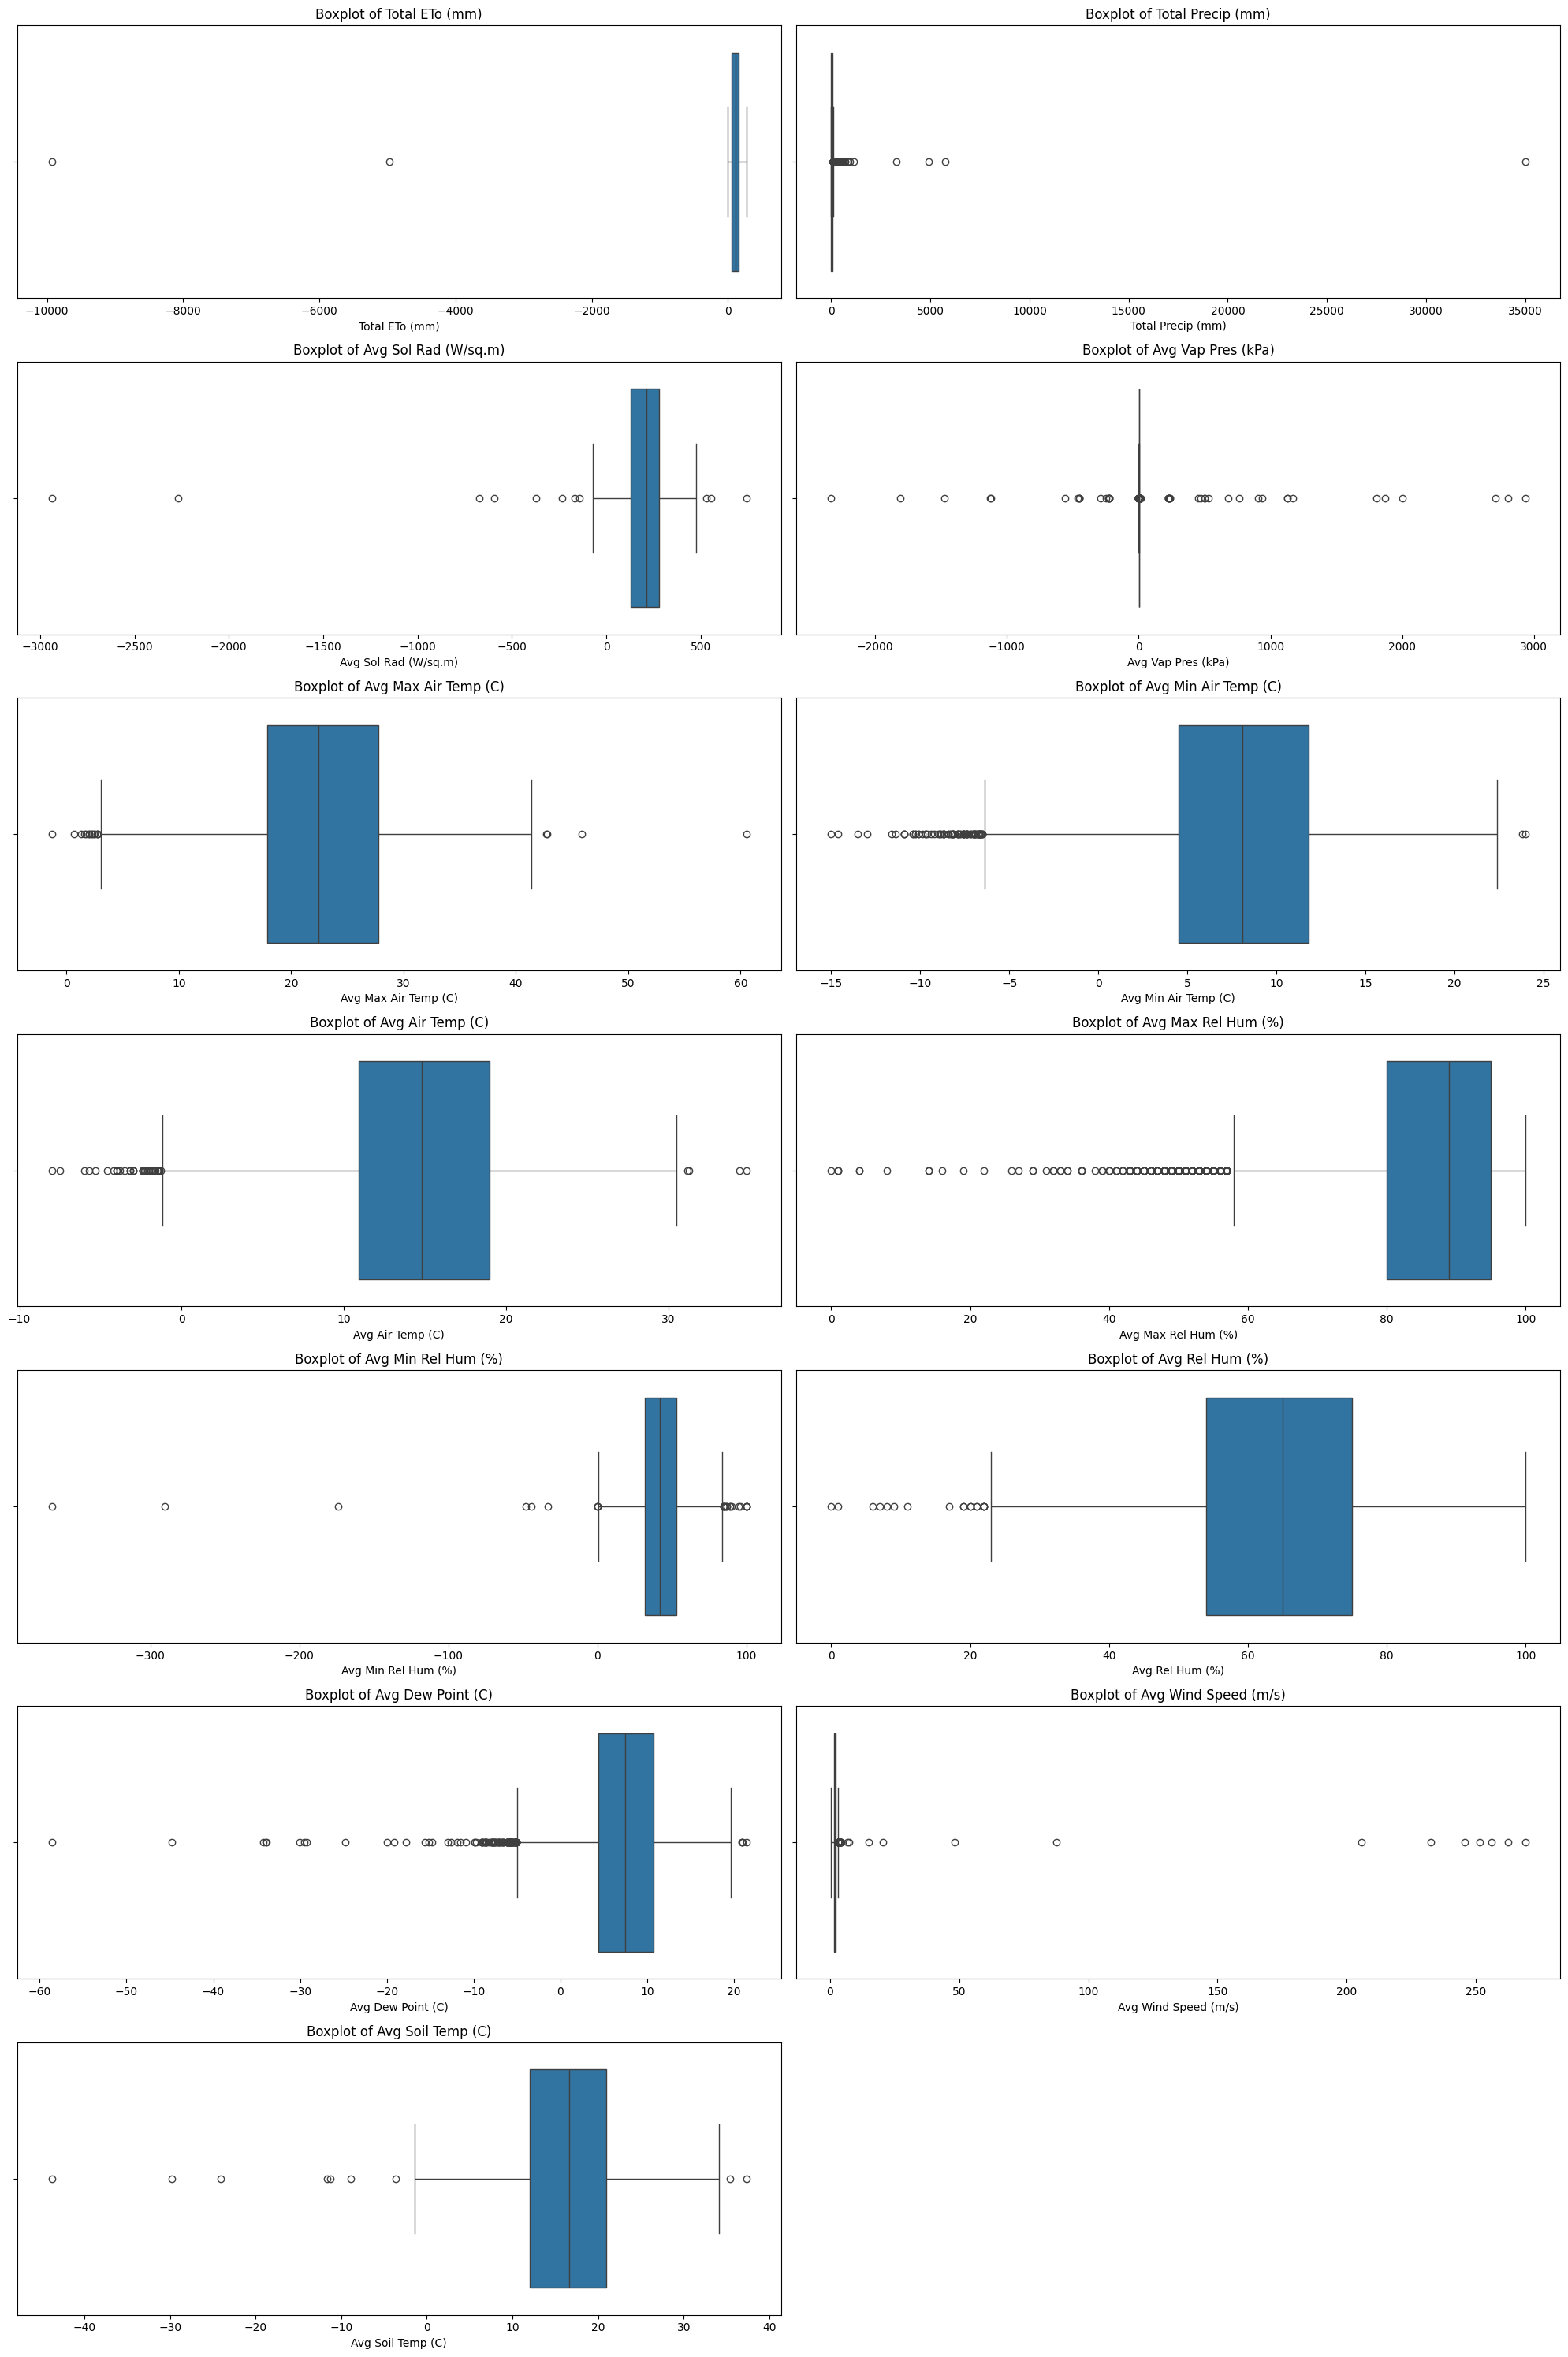

In [36]:
import seaborn as sns

# Define numerical columns to analyze for outliers
numerical_columns = [
    'Total ETo (mm)', 'Total Precip (mm)', 'Avg Sol Rad (W/sq.m)',
    'Avg Vap Pres (kPa)', 'Avg Max Air Temp (C)', 'Avg Min Air Temp (C)',
    'Avg Air Temp (C)', 'Avg Max Rel Hum (%)', 'Avg Min Rel Hum (%)',
    'Avg Rel Hum (%)', 'Avg Dew Point (C)', 'Avg Wind Speed (m/s)', 'Avg Soil Temp (C)'
]

# Set up the figure size for better visualization
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical column to visualize outliers
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(x=weather_cleaned[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

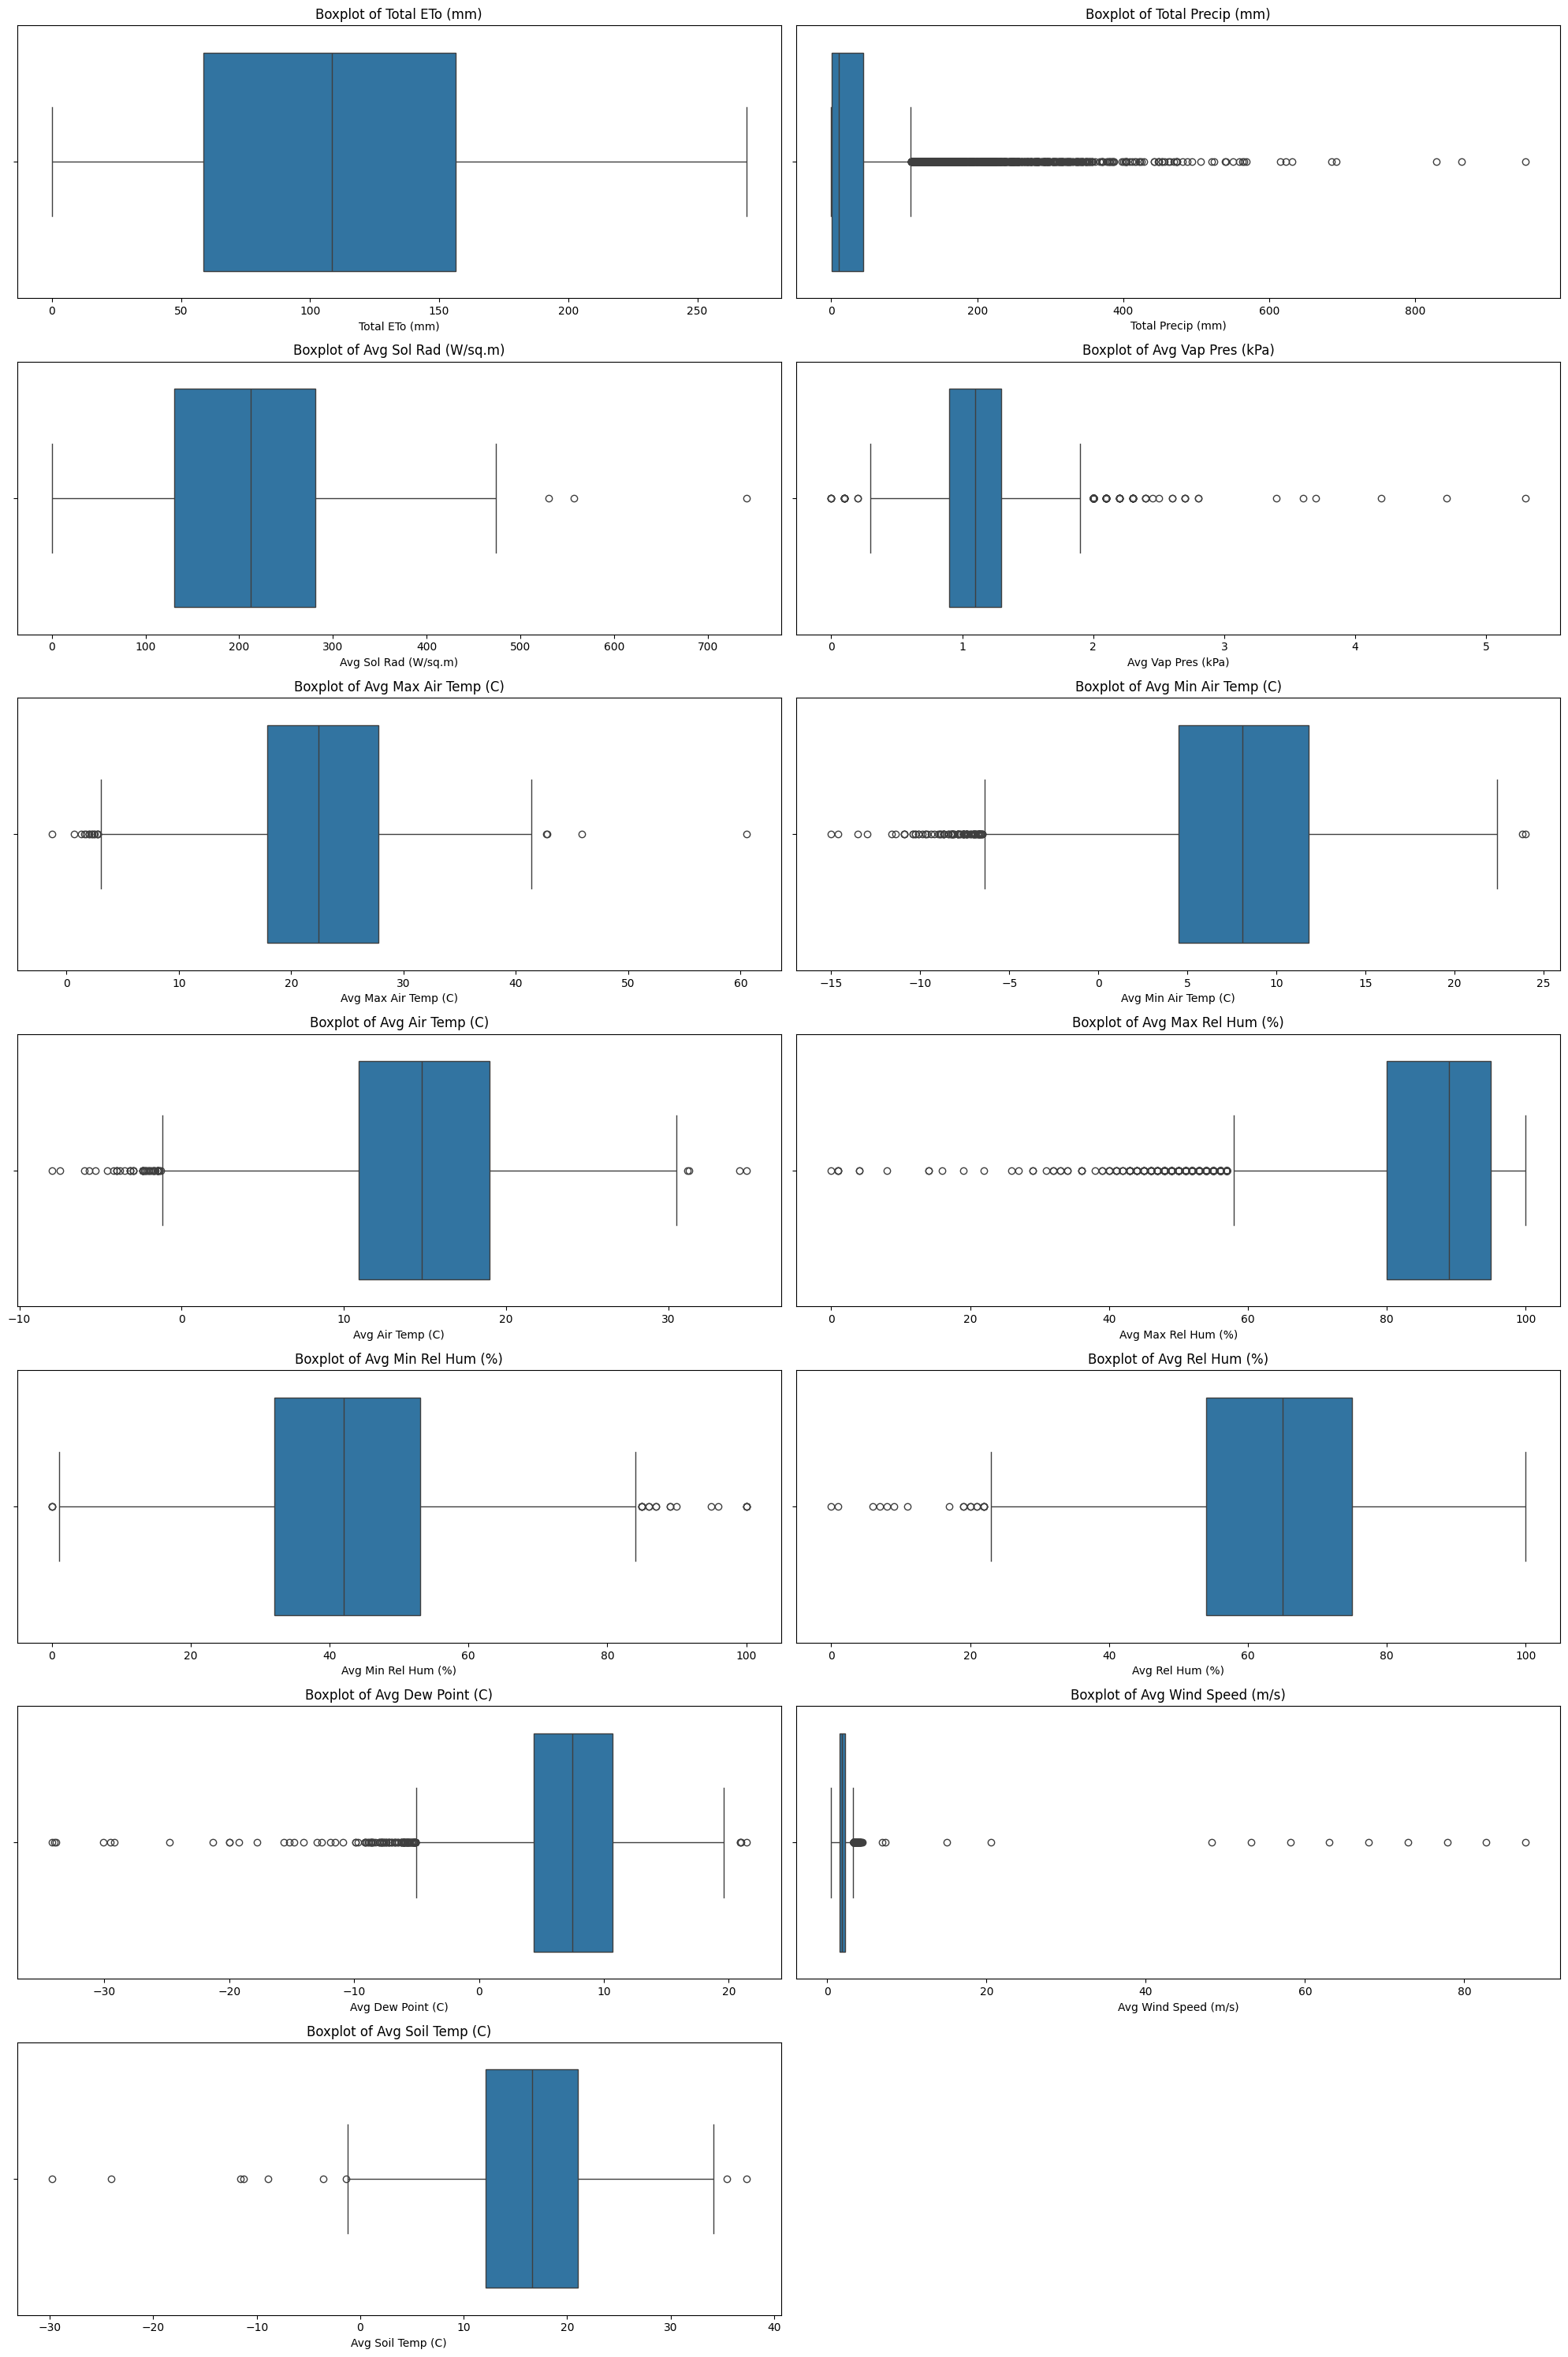

In [37]:
import numpy as np

# Step 1: Handle irrational outlier values by replacing them with NaN
# Replace negative values and unrealistic values with NaN for relevant columns
for column in numerical_columns:
    # Replace negative values with NaN for all columns where it is not possible (e.g: percentages)
    if column not in ['Avg Max Air Temp (C)', 'Avg Min Air Temp (C)', 'Avg Air Temp (C)', 'Avg Dew Point (C)', 'Avg Soil Temp (C)']:
        weather_cleaned[column] = weather_cleaned[column].apply(lambda x: np.nan if x < 0 else x)

    # Handle specific upper thresholds for certain columns based on domain knowledge
    if column == 'Total Precip (mm)':
        weather_cleaned[column] = weather_cleaned[column].apply(lambda x: np.nan if x > 1000 else x)
    elif column == 'Avg Vap Pres (kPa)':
        weather_cleaned[column] = weather_cleaned[column].apply(lambda x: np.nan if x > 10 else x)
    elif column == 'Avg Wind Speed (m/s)':
        weather_cleaned[column] = weather_cleaned[column].apply(lambda x: np.nan if x > 100 else x)

    # Replace extremely low temperature values with NaN for temperature-related columns
    if column in ['Avg Max Air Temp (C)', 'Avg Min Air Temp (C)', 'Avg Air Temp (C)', 'Avg Dew Point (C)', 'Avg Soil Temp (C)']:
        weather_cleaned[column] = weather_cleaned[column].apply(lambda x: np.nan if x < -40 else x)

    # Replace negative percentages with NaN for relevant columns
    if '%' in column:
        weather_cleaned[column] = weather_cleaned[column].apply(lambda x: np.nan if x < 0 else x)

# Step 2: Handle missing values using interpolation
# Apply linear interpolation for missing values to ensure smooth continuity in the dataset
weather_cleaned[numerical_columns] = weather_cleaned[numerical_columns].interpolate(method='linear', limit_direction='both')

# Step 3: Plot the numerical columns to visualize the new state after handling missing values
plt.figure(figsize=(20, 30))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(x=weather_cleaned[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [38]:
weather_cleaned.isnull().sum()

Stn Name                0
Month Year              0
Total ETo (mm)          0
Total Precip (mm)       0
Avg Sol Rad (W/sq.m)    0
Avg Vap Pres (kPa)      0
Avg Max Air Temp (C)    0
Avg Min Air Temp (C)    0
Avg Air Temp (C)        0
Avg Max Rel Hum (%)     0
Avg Min Rel Hum (%)     0
Avg Rel Hum (%)         0
Avg Dew Point (C)       0
Avg Wind Speed (m/s)    0
Avg Soil Temp (C)       0
dtype: int64

In [39]:
weather_cleaned.head()

,Stn Name,Month Year,Total ETo (mm),Total Precip (mm),Avg Sol Rad (W/sq.m),Avg Vap Pres (kPa),Avg Max Air Temp (C),Avg Min Air Temp (C),Avg Air Temp (C),Avg Max Rel Hum (%),Avg Min Rel Hum (%),Avg Rel Hum (%),Avg Dew Point (C),Avg Wind Speed (m/s),Avg Soil Temp (C)
0,FivePoints,Jun 1982,151.65,3.0,272.0,1.7,32.1,15.2,22.6,85.0,22.0,65.0,15.3,2.8,25.6
1,FivePoints,Jul 1982,229.60,4.0,313.0,1.5,35.6,14.9,25.3,77.0,14.0,46.0,12.4,2.4,26.1
2,FivePoints,Aug 1982,205.94,0.0,282.0,1.4,35.2,16.1,25.4,81.0,20.0,44.0,11.9,2.5,26.5
3,FivePoints,Sep 1982,139.25,30.0,222.0,1.2,30.3,10.1,19.9,91.0,30.0,54.0,9.5,2.2,23.4
4,FivePoints,Oct 1982,120.16,0.0,197.0,0.8,29.9,7.1,17.6,80.0,18.0,40.0,3.6,2.0,19.4


In [40]:
weather_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11977 entries, 0 to 13490
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stn Name              11977 non-null  object 
 1   Month Year            11977 non-null  object 
 2   Total ETo (mm)        11977 non-null  float64
 3   Total Precip (mm)     11977 non-null  float64
 4   Avg Sol Rad (W/sq.m)  11977 non-null  float64
 5   Avg Vap Pres (kPa)    11977 non-null  float64
 6   Avg Max Air Temp (C)  11977 non-null  float64
 7   Avg Min Air Temp (C)  11977 non-null  float64
 8   Avg Air Temp (C)      11977 non-null  float64
 9   Avg Max Rel Hum (%)   11977 non-null  float64
 10  Avg Min Rel Hum (%)   11977 non-null  float64
 11  Avg Rel Hum (%)       11977 non-null  float64
 12  Avg Dew Point (C)     11977 non-null  float64
 13  Avg Wind Speed (m/s)  11977 non-null  float64
 14  Avg Soil Temp (C)     11977 non-null  float64
dtypes: float64(13), object(2

## Dataset Integration for Feature-Label Mapping

In [41]:
# Step 1: Prepare the fire dataset for merging
# Convert fire dates to month-year format to match the weather dataset and replace the DATE column
fires_cleaned['DATE'] = fires_cleaned['DATE'].dt.to_period('M')
fires_cleaned.rename(columns={'DATE': 'Month Year'}, inplace=True)
fires_cleaned.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_16444\2711813522.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fires_cleaned['DATE'] = fires_cleaned['DATE'].dt.to_period('M')


,LOCATION,Month Year,AREA_SQUARE_KM
0,Tulelake FS,2023-06,0.023185
1,Durham,2023-06,0.055047
2,Plymouth,2023-07,0.112561
3,Plymouth,2023-07,0.237794
4,Plymouth,2023-07,0.287242


In [42]:
# Step 2: Aggregate fire data by month and location
fire_aggregated = fires_cleaned.groupby(['LOCATION', 'Month Year']).agg({
    'AREA_SQUARE_KM': 'sum',  # Sum of fire area for the month
}).reset_index()

# Add a column for the number of fire events in each group
fire_aggregated['Fire Count'] = fires_cleaned.groupby(['LOCATION', 'Month Year']).size().values

# Display the aggregated dataset to verify
fire_aggregated.head()

,LOCATION,Month Year,AREA_SQUARE_KM,Fire Count
0,Auburn,2014-01,0.068851,1
1,Auburn,2014-09,1.018260,1
2,Auburn,2021-08,0.889209,1
3,Auburn,2022-07,0.085360,1
4,Browns Valley,1950-07,20.842562,2


In [43]:
# Step 3: Create a common key for merging in both datasets
# Convert the 'Month Year' column in the weather dataset to 'period[M]' format
weather_cleaned['Month Year'] = pd.to_datetime(weather_cleaned['Month Year'], format='%b %Y').dt.to_period('M')
# Create a 'key' column that combines location and month-year
weather_cleaned['key'] = weather_cleaned['Stn Name'] + '_' + weather_cleaned['Month Year'].astype(str)
fire_aggregated['key'] = fire_aggregated['LOCATION'] + '_' + fire_aggregated['Month Year'].astype(str)



In [44]:
fire_aggregated.head()

,LOCATION,Month Year,AREA_SQUARE_KM,Fire Count,key
0,Auburn,2014-01,0.068851,1,Auburn_2014-01
1,Auburn,2014-09,1.018260,1,Auburn_2014-09
2,Auburn,2021-08,0.889209,1,Auburn_2021-08
3,Auburn,2022-07,0.085360,1,Auburn_2022-07
4,Browns Valley,1950-07,20.842562,2,Browns Valley_1950-07


In [45]:
weather_cleaned.head()

,Stn Name,Month Year,Total ETo (mm),Total Precip (mm),Avg Sol Rad (W/sq.m),Avg Vap Pres (kPa),Avg Max Air Temp (C),Avg Min Air Temp (C),Avg Air Temp (C),Avg Max Rel Hum (%),Avg Min Rel Hum (%),Avg Rel Hum (%),Avg Dew Point (C),Avg Wind Speed (m/s),Avg Soil Temp (C),key
0,FivePoints,1982-06,151.65,3.0,272.0,1.7,32.1,15.2,22.6,85.0,22.0,65.0,15.3,2.8,25.6,FivePoints_1982-06
1,FivePoints,1982-07,229.60,4.0,313.0,1.5,35.6,14.9,25.3,77.0,14.0,46.0,12.4,2.4,26.1,FivePoints_1982-07
2,FivePoints,1982-08,205.94,0.0,282.0,1.4,35.2,16.1,25.4,81.0,20.0,44.0,11.9,2.5,26.5,FivePoints_1982-08
3,FivePoints,1982-09,139.25,30.0,222.0,1.2,30.3,10.1,19.9,91.0,30.0,54.0,9.5,2.2,23.4,FivePoints_1982-09
4,FivePoints,1982-10,120.16,0.0,197.0,0.8,29.9,7.1,17.6,80.0,18.0,40.0,3.6,2.0,19.4,FivePoints_1982-10


In [46]:
# Step 4: Merge the weather data with aggregated fire data
dataset = pd.merge(weather_cleaned, fire_aggregated, how='left', on='key')

# Step 5: Fill missing fire values with 0 (indicating no fires in that month)
dataset['AREA_SQUARE_KM'] = dataset['AREA_SQUARE_KM'].fillna(0)
dataset['Fire Count'] = dataset['Fire Count'].fillna(0)

# Display the final dataset to verify
dataset.head()


,Stn Name,Month Year_x,Total ETo (mm),Total Precip (mm),Avg Sol Rad (W/sq.m),Avg Vap Pres (kPa),Avg Max Air Temp (C),Avg Min Air Temp (C),Avg Air Temp (C),Avg Max Rel Hum (%),Avg Min Rel Hum (%),Avg Rel Hum (%),Avg Dew Point (C),Avg Wind Speed (m/s),Avg Soil Temp (C),key,LOCATION,Month Year_y,AREA_SQUARE_KM,Fire Count
0,FivePoints,1982-06,151.65,3.0,272.0,1.7,32.1,15.2,22.6,85.0,22.0,65.0,15.3,2.8,25.6,FivePoints_1982-06,FivePoints,1982-06,3.598080,2.0
1,FivePoints,1982-07,229.60,4.0,313.0,1.5,35.6,14.9,25.3,77.0,14.0,46.0,12.4,2.4,26.1,FivePoints_1982-07,FivePoints,1982-07,31.572588,1.0
2,FivePoints,1982-08,205.94,0.0,282.0,1.4,35.2,16.1,25.4,81.0,20.0,44.0,11.9,2.5,26.5,FivePoints_1982-08,FivePoints,1982-08,3.748602,2.0
3,FivePoints,1982-09,139.25,30.0,222.0,1.2,30.3,10.1,19.9,91.0,30.0,54.0,9.5,2.2,23.4,FivePoints_1982-09,NaN,NaT,0.000000,0.0
4,FivePoints,1982-10,120.16,0.0,197.0,0.8,29.9,7.1,17.6,80.0,18.0,40.0,3.6,2.0,19.4,FivePoints_1982-10,NaN,NaT,0.000000,0.0


## Exploratory Data Analysis for the Final Dataset

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11977 entries, 0 to 11976
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   Stn Name              11977 non-null  object   
 1   Month Year_x          11977 non-null  period[M]
 2   Total ETo (mm)        11977 non-null  float64  
 3   Total Precip (mm)     11977 non-null  float64  
 4   Avg Sol Rad (W/sq.m)  11977 non-null  float64  
 5   Avg Vap Pres (kPa)    11977 non-null  float64  
 6   Avg Max Air Temp (C)  11977 non-null  float64  
 7   Avg Min Air Temp (C)  11977 non-null  float64  
 8   Avg Air Temp (C)      11977 non-null  float64  
 9   Avg Max Rel Hum (%)   11977 non-null  float64  
 10  Avg Min Rel Hum (%)   11977 non-null  float64  
 11  Avg Rel Hum (%)       11977 non-null  float64  
 12  Avg Dew Point (C)     11977 non-null  float64  
 13  Avg Wind Speed (m/s)  11977 non-null  float64  
 14  Avg Soil Temp (C)     11977 non-null  

In [48]:
# Drop the redundant 'Month Year_y' and 'LOCATION' columns as they are not needed for further analysis
dataset.drop(columns=['Month Year_y', 'LOCATION', 'key'], inplace=True)
dataset.rename(columns={'Month Year_x': 'Date', 'Stn Name': 'Location', 'AREA_SQUARE_KM': 'Fire Area'}, inplace=True)

# Display the cleaned dataset
dataset.head()


,Location,Date,Total ETo (mm),Total Precip (mm),Avg Sol Rad (W/sq.m),Avg Vap Pres (kPa),Avg Max Air Temp (C),Avg Min Air Temp (C),Avg Air Temp (C),Avg Max Rel Hum (%),Avg Min Rel Hum (%),Avg Rel Hum (%),Avg Dew Point (C),Avg Wind Speed (m/s),Avg Soil Temp (C),Fire Area,Fire Count
0,FivePoints,1982-06,151.65,3.0,272.0,1.7,32.1,15.2,22.6,85.0,22.0,65.0,15.3,2.8,25.6,3.598080,2.0
1,FivePoints,1982-07,229.60,4.0,313.0,1.5,35.6,14.9,25.3,77.0,14.0,46.0,12.4,2.4,26.1,31.572588,1.0
2,FivePoints,1982-08,205.94,0.0,282.0,1.4,35.2,16.1,25.4,81.0,20.0,44.0,11.9,2.5,26.5,3.748602,2.0
3,FivePoints,1982-09,139.25,30.0,222.0,1.2,30.3,10.1,19.9,91.0,30.0,54.0,9.5,2.2,23.4,0.000000,0.0
4,FivePoints,1982-10,120.16,0.0,197.0,0.8,29.9,7.1,17.6,80.0,18.0,40.0,3.6,2.0,19.4,0.000000,0.0


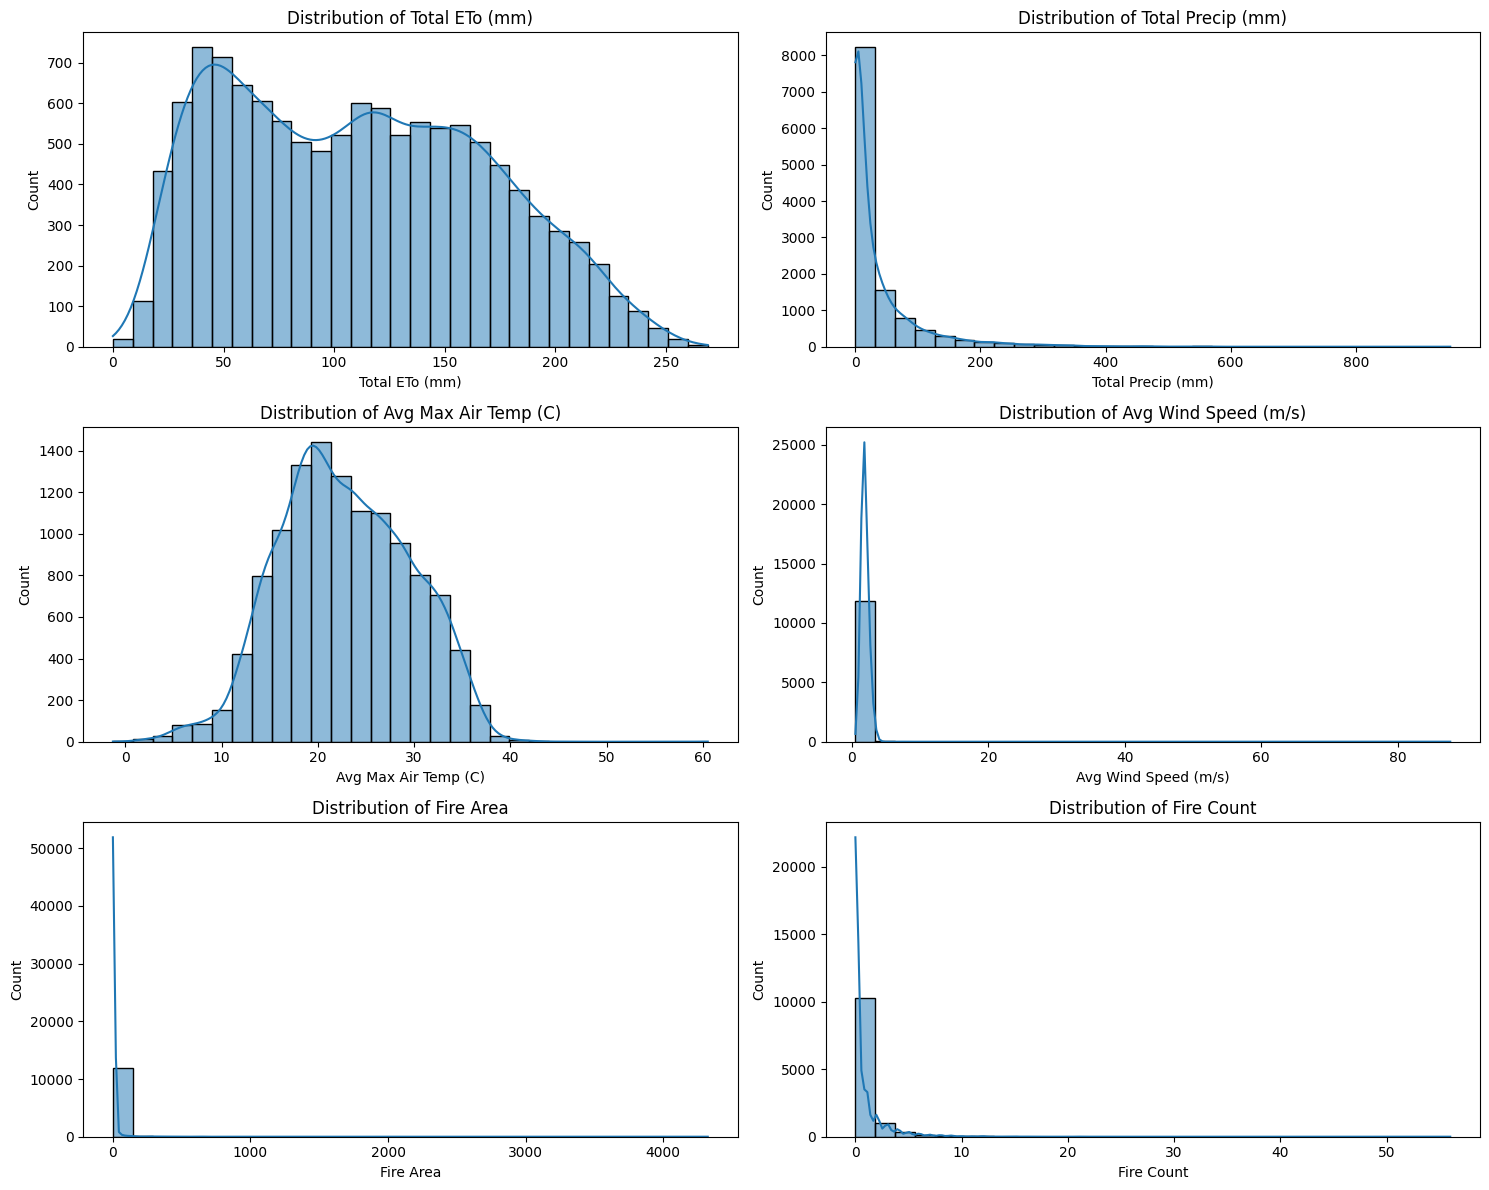

In [49]:
# Plot distributions of key weather features
features_to_plot = ['Total ETo (mm)', 'Total Precip (mm)', 'Avg Max Air Temp (C)', 'Avg Wind Speed (m/s)', 'Fire Area', 'Fire Count']
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


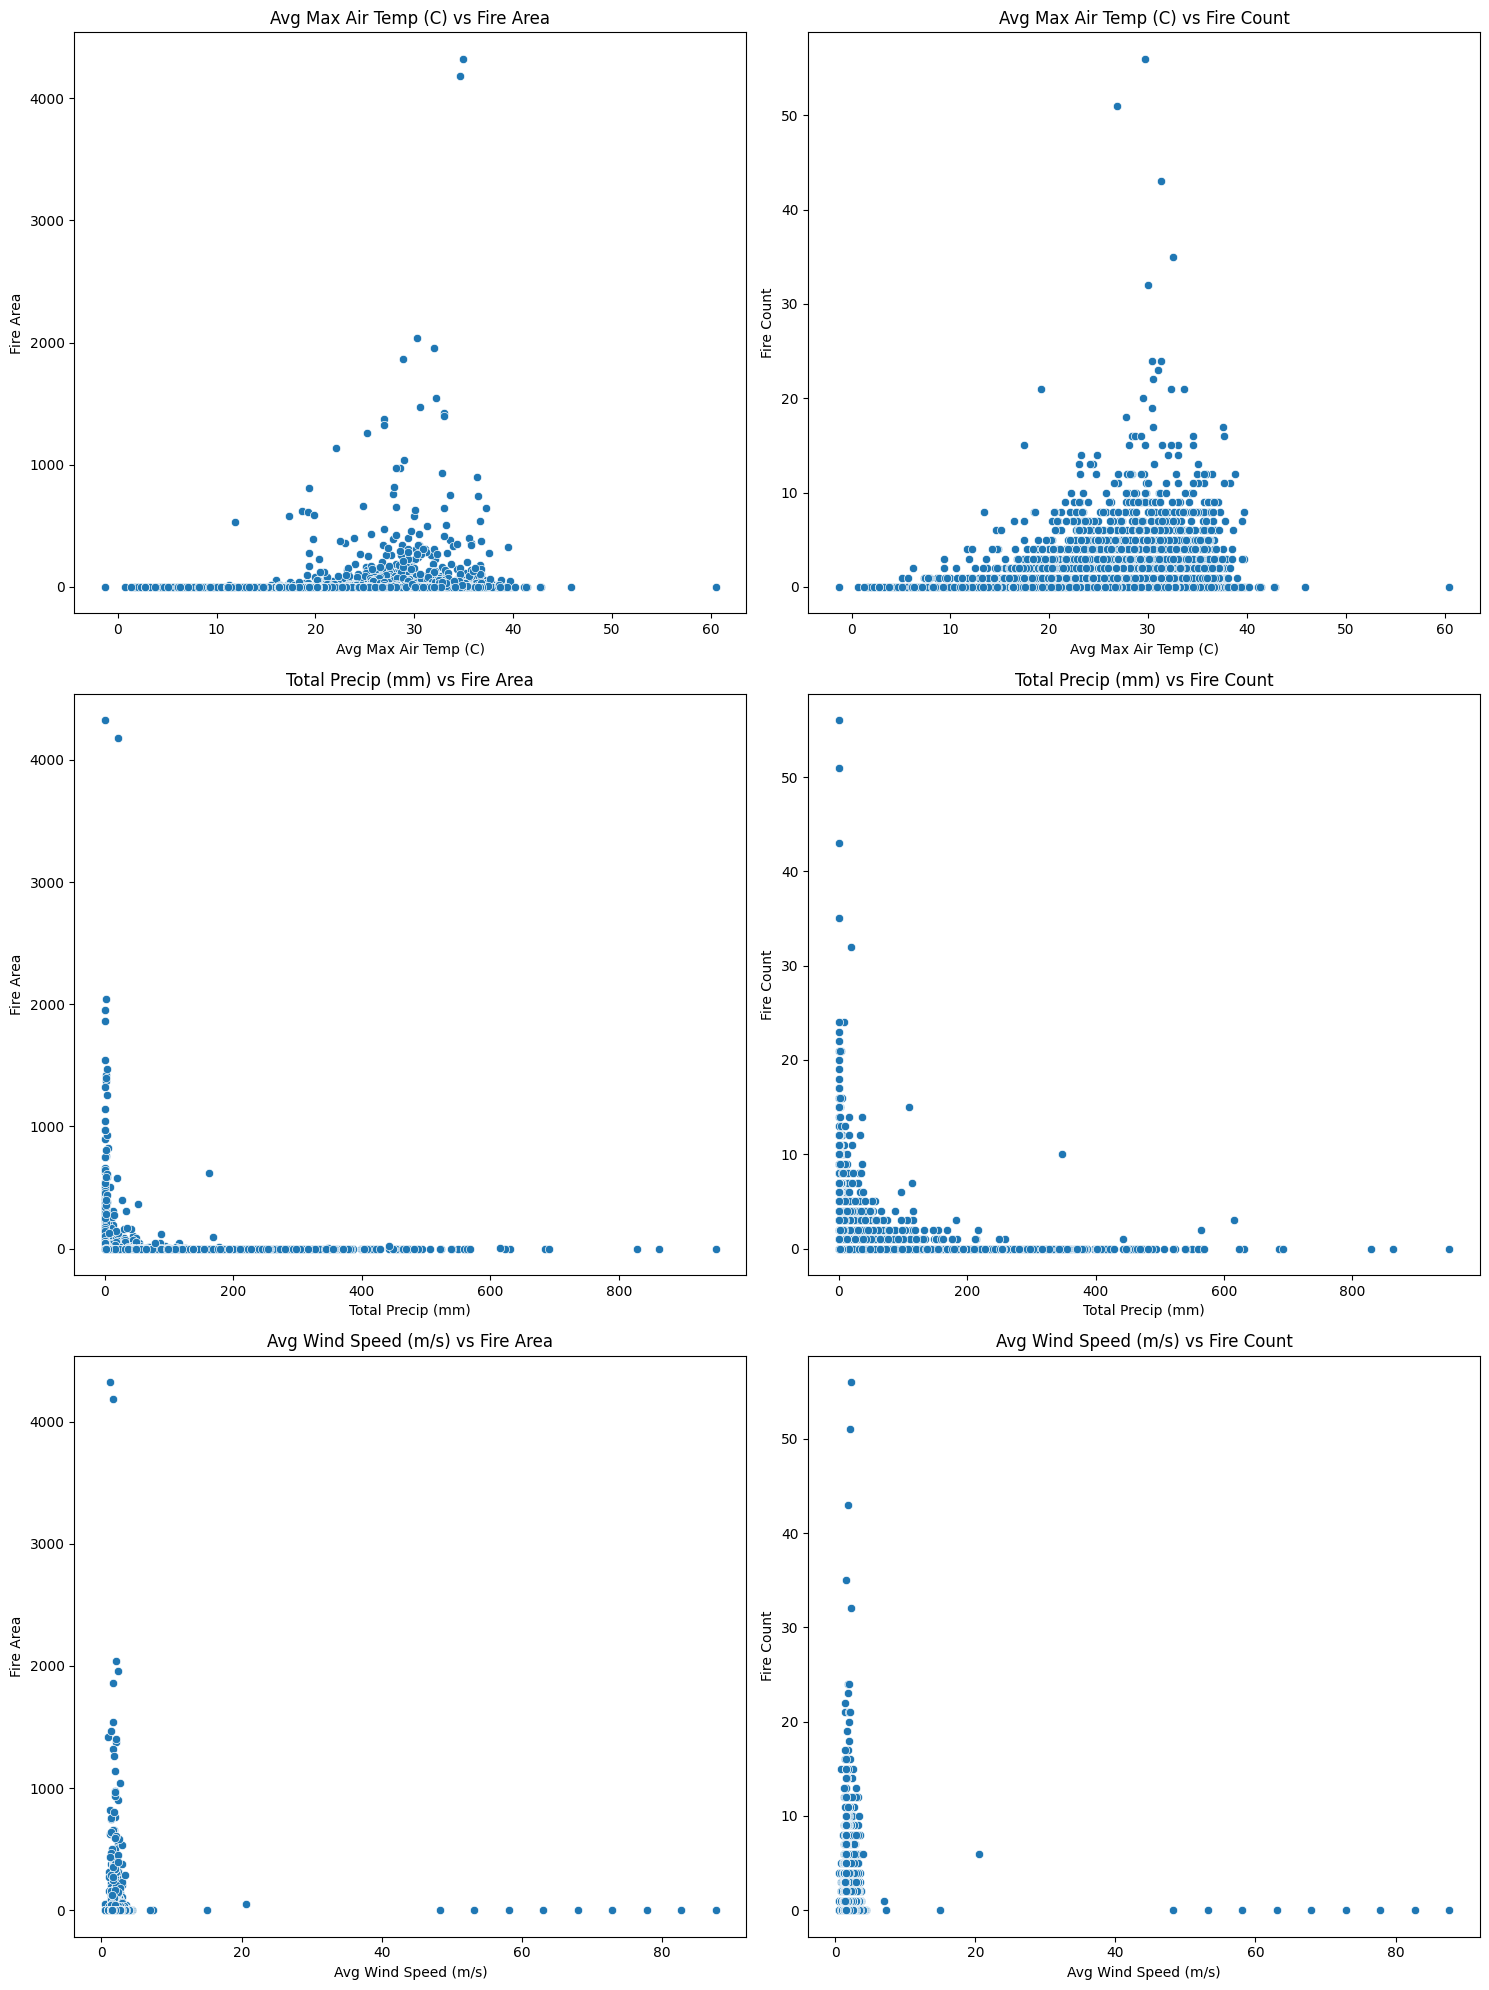

In [50]:
# Define the features to plot against the target variables
features_to_plot = ['Avg Max Air Temp (C)', 'Total Precip (mm)', 'Avg Wind Speed (m/s)']
target_variables = ['Fire Area', 'Fire Count']

# Generate scatter plots to explore relationships between features and target variables
plt.figure(figsize=(15, 20))

plot_num = 1
for feature in features_to_plot:
    for target in target_variables:
        plt.subplot(len(features_to_plot), len(target_variables), plot_num)
        sns.scatterplot(data=dataset, x=feature, y=target)
        plt.title(f'{feature} vs {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plot_num += 1

plt.tight_layout()
plt.show()


## Data Preprocessing for the Final Dataset

In [51]:
from sklearn.preprocessing import OneHotEncoder

# Step 1: Feature Encoding
# Extract month from Date and drop Date
dataset['Month'] = pd.to_datetime(dataset['Date'].astype(str)).dt.month

# Cyclical Encoding for Month
dataset['Month_sin'] = np.sin(2 * np.pi * dataset['Month'] / 12)
dataset['Month_cos'] = np.cos(2 * np.pi * dataset['Month'] / 12)
dataset = dataset.drop(columns=['Month'])

# One-Hot Encode categorical features (Location)
categorical_features = ['Location']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(dataset[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded categorical features with numerical features
numerical_features = dataset.drop(columns=categorical_features + ['Fire Area', 'Fire Count'])
X = pd.concat([numerical_features.reset_index(drop=True), categorical_encoded.reset_index(drop=True)], axis=1)

# Separate Labels for Hybrid Approach
y_classification = (dataset['Fire Count'] > 0).astype(int)  # Label for fire occurrence classification: 1 if fire occurred, 0 otherwise
y_regression = dataset['Fire Area']  # Label for fire area prediction (severity)

In [52]:
from imblearn.over_sampling import SMOTE

# Step 2: Balancing the Data (for Classification Task Only)
# Count the number of 0 values in the 'Fire Count' column
count_zero = (y_classification == 0).sum()
# Count the number of values different from 0 in the 'Fire Count' column
count_non_zero = (y_classification != 0).sum()

print(f"Number of 0 values (No Fire): {count_zero}")
print(f"Number of non-zero values (Fire Occurrence): {count_non_zero}")

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled_classification, y_resampled_classification = smote.fit_resample(X.select_dtypes(include=[np.number]), y_classification)

Number of 0 values (No Fire): 8848
Number of non-zero values (Fire Occurrence): 3129


In [53]:
from sklearn.preprocessing import StandardScaler

# Step 3: Feature Scaling
# Scale features for both tasks
scaler = StandardScaler()
# For Classification Task
X_resampled_classification = scaler.fit_transform(X_resampled_classification)
# For Regression Task
X_scaled_regression = scaler.fit_transform(X.select_dtypes(include=[np.number]))

## Cross-Validation with Time Spans

In [54]:
from sklearn.model_selection import TimeSeriesSplit

# Use time series cross-validation to split datasets
tscv = TimeSeriesSplit(n_splits=5)

## Classification Model Training

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_resampled_classification, y_resampled_classification, test_size=0.2, random_state=42)

# Using Gradient Boosting Classifier for fire occurrence prediction
classification_model = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42)
classification_model.fit(X_train_class, y_train_class)

# Cross-validation for classification model
accuracy_scores = cross_val_score(classification_model, X_train_class, y_train_class, cv=tscv, scoring='accuracy')

# Predictions for classification model
y_pred_class = classification_model.predict(X_test_class)

## Final Evaluation of the Classification Model

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 6: Evaluation of classification model
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print(f'Cross-Validation Accuracy (Classification Model): {accuracy_scores.mean()}')
print(f'Test Set Accuracy (Classification Model): {classification_accuracy}')
print(f'Confusion Matrix (Classification Model):\n{conf_matrix}')
print(f'Classification Report (Classification Model):\n{class_report}')

Cross-Validation Accuracy (Classification Model): 0.8616362865621026
Test Set Accuracy (Classification Model): 0.8793785310734463
Confusion Matrix (Classification Model):
[[1572  228]
 [ 199 1541]]
Classification Report (Classification Model):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1800
           1       0.87      0.89      0.88      1740

    accuracy                           0.88      3540
   macro avg       0.88      0.88      0.88      3540
weighted avg       0.88      0.88      0.88      3540



## Model Interpretation

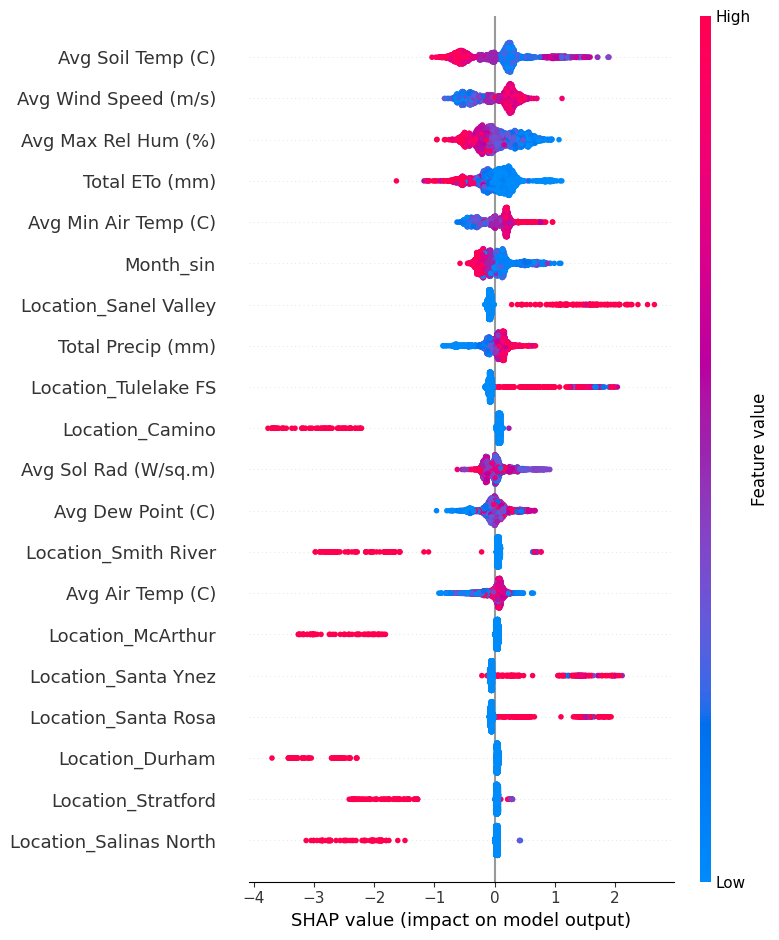

In [57]:
import shap

# Explainability with SHAP
explainer = shap.TreeExplainer(classification_model)
shap_values = explainer.shap_values(X_test_class, check_additivity=False)

# Plot summary of SHAP values for the test set
shap.summary_plot(shap_values, X_test_class, feature_names=X.columns)


## Saving the classification model

In [58]:
import joblib

joblib.dump(classification_model, 'fire_occurrence_classifier.pkl')

['fire_occurrence_classifier.pkl']